# Figure S2 a,c,e,g

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
COLOR = sns.color_palette("tab20")

## GENDER

In [ ]:
df=pd.read_csv("C:/Users/86158/Desktop/外卖糖分摄入/程序整理/异质性分析_最终版本/异质性分析/gender/cities.csv",parse_dates=['dt'],index_col=['dt'])
df.replace([np.inf, -np.inf], np.nan, inplace=True)
#筛选夏季数据
beijing=df[(df['city']=='beijing')]['2019-05-21':'2019-09-16']
xian=df[(df['city'] =='xian')]['2019-05-21':'2019-09-09']
changsha=df[(df['city'] =='changsha')]['2019-05-22':'2019-10-10']
shenzhen=df[(df['city'] =='shenzhen')]['2019-03-26':'2019-11-27']
#甜点订单归一化处理
beijing['num_dessert']=beijing['num_dessert']/beijing['num_dessert'].max()
xian['num_dessert']=xian['num_dessert']/xian['num_dessert'].max()
changsha['num_dessert']=changsha['num_dessert']/changsha['num_dessert'].max()
shenzhen['num_dessert']=shenzhen['num_dessert']/shenzhen['num_dessert'].max()
#糖分归一化处理
beijing.loc[beijing['gender']=='F', 'sugar_weight'] = beijing.loc[beijing['gender']=='F', 'sugar_weight'] * 100 / 12062.13744
beijing.loc[beijing['gender']=='M', 'sugar_weight'] = beijing.loc[beijing['gender']=='M', 'sugar_weight'] * 100 / 5826.70018
xian.loc[xian['gender']=='F', 'sugar_weight'] = xian.loc[xian['gender']=='F', 'sugar_weight'] * 100 / 7454.43626
xian.loc[xian['gender']=='M', 'sugar_weight'] = xian.loc[xian['gender']=='M', 'sugar_weight'] * 100 / 3868.09594
changsha.loc[changsha['gender']=='F', 'sugar_weight'] = changsha.loc[changsha['gender']=='F', 'sugar_weight'] * 100 / 11017.04536
changsha.loc[changsha['gender']=='M', 'sugar_weight'] = changsha.loc[changsha['gender']=='M', 'sugar_weight'] * 100 / 5199.3620599999995
shenzhen.loc[shenzhen['gender']=='F', 'sugar_weight'] = shenzhen.loc[shenzhen['gender']=='F', 'sugar_weight'] * 100 /  9228.371869999999
shenzhen.loc[shenzhen['gender']=='M', 'sugar_weight'] = shenzhen.loc[shenzhen['gender']=='M', 'sugar_weight'] * 100 / 5665.27664

#筛选夏季期间大于等于21摄氏度的数据
df = pd.concat([beijing,xian,changsha,shenzhen])
df=df.dropna()
df=df[df['MAX']>=21]
df['MAX']=df['MAX']-22


#将控制变量按范围划分为8段
NUM_BINS=8
col=['RH','num_dessert','WDSP','PRCP']
dic={}
for i in col:
    dic[i+'_min']=df[i].min()
    dic[i+'_max']=df[i].max()
    interval=(df[i].max()-df[i].min())/(NUM_BINS-1)
    dic[i+'_bins']=np.arange(df[i].min(),df[i].max()+1.5*interval,interval).tolist()
print(dic)
df['RH_cut'] = pd.cut(df['RH'], bins=dic['RH_bins'], labels=range(0, NUM_BINS),right=False).astype(int)
df['num_dessert_cut'] = pd.cut(df['num_dessert'], bins=dic['num_dessert_bins'], labels=range(0,NUM_BINS),right=False).astype(int)
df['WDSP_cut'] = pd.cut(df['WDSP'], bins=dic['WDSP_bins'], labels=range(0, NUM_BINS),right=False).astype(int)
df['PRCP_cut'] = pd.cut(df['PRCP'], bins=dic['PRCP_bins'], labels=range(0, NUM_BINS),right=False).astype(int)

#拟合模型
ols_male = ols('sugar_weight ~ MAX+RH_cut+PRCP_cut+WDSP_cut+num_dessert_cut+C(week_dt)+C(city)', df[df['gender']=='M'])
ols_male = ols_male.fit()
print(ols_male.summary())
ols_female = ols('sugar_weight ~ MAX+RH_cut+PRCP_cut+WDSP_cut+num_dessert_cut+C(week_dt)+C(city)', df[df['gender']=='F'])
ols_female = ols_female.fit()
print(ols_female.summary())

{'RH_min': 18.6, 'RH_max': 100.0, 'RH_bins': [18.6, 30.22857142857143, 41.85714285714286, 53.48571428571429, 65.11428571428573, 76.74285714285716, 88.37142857142857, 100.0, 111.62857142857143], 'num_dessert_min': 0.2485207100591716, 'num_dessert_max': 1.0, 'num_dessert_bins': [0.2485207100591716, 0.3558748943364328, 0.46322907861369406, 0.5705832628909553, 0.6779374471682165, 0.7852916314454776, 0.892645815722739, 1.0000000000000002, 1.1073541842772614], 'WDSP_min': 1.2, 'WDSP_max': 6.6, 'WDSP_bins': [1.2, 1.9714285714285713, 2.742857142857143, 3.5142857142857142, 4.285714285714286, 5.057142857142857, 5.828571428571428, 6.6, 7.371428571428571], 'PRCP_min': 0.0, 'PRCP_max': 101.09, 'PRCP_bins': [0.0, 14.441428571428572, 28.882857142857144, 43.324285714285715, 57.76571428571429, 72.20714285714286, 86.64857142857143, 101.09, 115.53142857142858]}
                            OLS Regression Results                            
Dep. Variable:           sugar_weight   R-squared:                

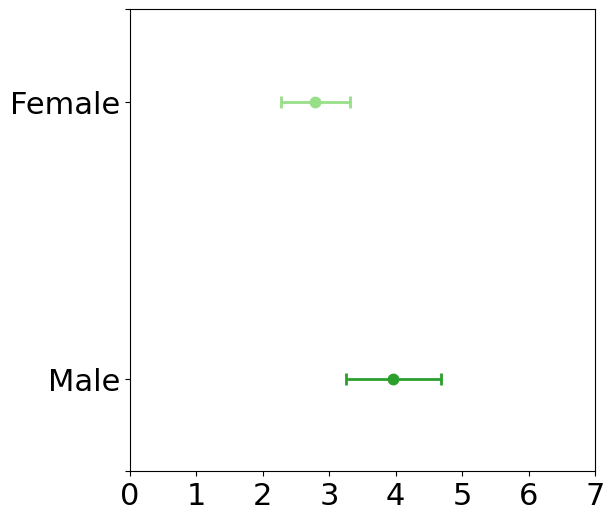

In [3]:
gender_colors = {
    'Male': COLOR[4],
    'Female': COLOR[5],
}
groups=['Male','Female']
model_offset={
    'Male': 0.1,
    'Female': -0.1,
}
olses=[ols_male,ols_female]
#olses=olses[::-1]
plt.figure(figsize=(6, 6))
added_labels = set()

for group, ols in zip(groups, olses):
    dy_low, dy_high = ols.conf_int().loc['MAX']
    dy = (dy_high - dy_low) / 2
    x = ols.params['MAX'] + model_offset[group]  # 调整 x 值
    y = 0.2 if group == 'Male' else 0.8  # 将 'M' 和 'F' 转换为纵坐标值
    plt.errorbar(x, y, xerr=dy, fmt='.', markersize=15,
                 ecolor=gender_colors[group], color=gender_colors[group], elinewidth=2, capsize=4, capthick=2)

plt.yticks([0, 0.2,0.8, 1], ['','Male',  'Female',''])  # 设置纵坐标刻度为 'M' 和 'F'，将 0.6 的位置留空
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(0,7)
#plt.yticks([])
path='C:/Users/86158/Desktop/外卖糖分摄入/程序整理/figure_gender1.pdf'
plt.savefig(path)
plt.show()

## AGE

In [ ]:
from statsmodels.formula.api import ols
df=pd.read_csv("C:/Users/86158/Desktop/外卖糖分摄入/程序整理/异质性分析_最终版本/异质性分析/age/cities_age_cnt.csv",parse_dates=['dt'],index_col=['dt'])
df.replace([np.inf, -np.inf], np.nan, inplace=True)
#筛选夏季数据
beijing=df[(df['city']=='beijing')]['2019-05-21':'2019-09-16']
xian=df[(df['city'] =='xian')]['2019-05-21':'2019-09-09']
changsha=df[(df['city'] =='changsha')]['2019-05-22':'2019-10-10']
shenzhen=df[(df['city'] =='shenzhen')]['2019-03-26':'2019-11-27']
df=df[df['MAX']>=24]
#甜点订单归一化处理
beijing['num_dessert']=beijing['num_dessert']/beijing['num_dessert'].max()
xian['num_dessert']=xian['num_dessert']/xian['num_dessert'].max()
changsha['num_dessert']=changsha['num_dessert']/changsha['num_dessert'].max()
shenzhen['num_dessert']=shenzhen['num_dessert']/shenzhen['num_dessert'].max()
df = pd.concat([beijing,xian,changsha,shenzhen])
#糖分归一化处理
beijing_upper40=df[(df['city'] == 'beijing') & (df['age'] == 'upper40')]['2019-05-21':'2019-09-16']
xian_upper40=df[(df['city'] =='xian')& (df['age'] == 'upper40')]['2019-05-21':'2019-09-09']
changsha_upper40=df[(df['city'] =='changsha')& (df['age'] == 'upper40')]['2019-05-22':'2019-10-10']
shenzhen_upper40=df[(df['city'] =='shenzhen')& (df['age'] == 'upper40')]['2019-03-26':'2019-11-27']
beijing_between25and40=df[(df['city'] == 'beijing') & (df['age'] == 'between25and40')]['2019-05-21':'2019-09-16']
xian_between25and40=df[(df['city'] =='xian')& (df['age'] == 'between25and40')]['2019-05-21':'2019-09-09']
changsha_between25and40=df[(df['city'] =='changsha')& (df['age'] == 'between25and40')]['2019-05-22':'2019-10-10']
shenzhen_between25and40=df[(df['city'] =='shenzhen')& (df['age'] == 'between25and40')]['2019-03-26':'2019-11-27']
beijing_under25=df[(df['city'] == 'beijing') & (df['age'] == 'under25')]['2019-05-21':'2019-09-16']
xian_under25=df[(df['city'] =='xian')& (df['age'] == 'under25')]['2019-05-21':'2019-09-09']
changsha_under25=df[(df['city'] =='changsha')& (df['age'] == 'under25')]['2019-05-22':'2019-10-10']
shenzhen_under25=df[(df['city'] =='shenzhen')& (df['age'] == 'under25')]['2019-03-26':'2019-11-27']

beijing_upper40['sugar_weight']=beijing_upper40['sugar_weight']*100/2218.54226
xian_upper40['sugar_weight']=xian_upper40['sugar_weight']*100/911.4218742857144
changsha_upper40['sugar_weight']=changsha_upper40['sugar_weight']*100/1095.25128
shenzhen_upper40['sugar_weight']=shenzhen_upper40['sugar_weight']*100/1242.98313


beijing_between25and40['sugar_weight']=beijing_between25and40['sugar_weight']*100/9938.495180000002
xian_between25and40['sugar_weight']=xian_between25and40['sugar_weight']*100/7131.56884
changsha_between25and40['sugar_weight']=changsha_between25and40['sugar_weight']*100/9377.849410058177
shenzhen_between25and40['sugar_weight']=shenzhen_between25and40['sugar_weight']*100/10077.96968

beijing_under25['sugar_weight']=beijing_under25['sugar_weight']*100/4195.7757
xian_under25['sugar_weight']=xian_under25['sugar_weight']*100/2134.0204599999997
changsha_under25['sugar_weight']=changsha_under25['sugar_weight']*100/3933.933007142857
shenzhen_under25['sugar_weight']=shenzhen_under25['sugar_weight']*100/1835.01515


df = pd.concat([beijing_upper40,xian_upper40,changsha_upper40,shenzhen_upper40,
                beijing_between25and40,xian_between25and40,changsha_between25and40,shenzhen_between25and40,
                beijing_under25,xian_under25,changsha_under25,shenzhen_under25])
df=df.dropna()
df=df[df['MAX']>=21]
df['MAX']=df['MAX']-22
NUM_BINS=8
col=['RH','num_dessert','WDSP','PRCP']
dic={}
for i in col:
    dic[i+'_min']=df[i].min()
    dic[i+'_max']=df[i].max()
    interval=(df[i].max()-df[i].min())/(NUM_BINS-1)
    dic[i+'_bins']=np.arange(df[i].min(),df[i].max()+1.5*interval,interval).tolist()
print(dic)
df['RH_cut'] = pd.cut(df['RH'], bins=dic['RH_bins'], labels=range(0, NUM_BINS),right=False).astype(int)
df['num_dessert_cut'] = pd.cut(df['num_dessert'], bins=dic['num_dessert_bins'], labels=range(0,NUM_BINS),right=False).astype(int)
df['WDSP_cut'] = pd.cut(df['WDSP'], bins=dic['WDSP_bins'], labels=range(0, NUM_BINS),right=False).astype(int)
df['PRCP_cut'] = pd.cut(df['PRCP'], bins=dic['PRCP_bins'], labels=range(0, NUM_BINS),right=False).astype(int)
df['age_city'] = df['city'] + '_' + df['age']

ols_under25 = ols('sugar_weight ~ MAX+RH_cut+PRCP_cut+WDSP_cut+num_dessert_cut+C(week_dt)+C(city)', df[df['age']=='under25'])
ols_under25 = ols_under25.fit()
print(ols_under25.summary())
ols_between25and40 = ols('sugar_weight ~ MAX+RH_cut+PRCP_cut+WDSP_cut+num_dessert_cut+C(week_dt)+C(city)', df[df['age']=='between25and40'])
ols_between25and40 = ols_between25and40.fit()
print(ols_between25and40.summary())
ols_upper40 = ols('sugar_weight ~ MAX+RH_cut+PRCP_cut+WDSP_cut+num_dessert_cut+C(week_dt)+C(city)', df[df['age']=='upper40'])
ols_upper40 = ols_upper40.fit()
print(ols_upper40.summary())

{'RH_min': 18.6, 'RH_max': 100.0, 'RH_bins': [18.6, 30.22857142857143, 41.85714285714286, 53.48571428571429, 65.11428571428573, 76.74285714285716, 88.37142857142857, 100.0, 111.62857142857143], 'num_dessert_min': 0.2485207100591716, 'num_dessert_max': 1.0, 'num_dessert_bins': [0.2485207100591716, 0.3558748943364328, 0.46322907861369406, 0.5705832628909553, 0.6779374471682165, 0.7852916314454776, 0.892645815722739, 1.0000000000000002, 1.1073541842772614], 'WDSP_min': 1.2, 'WDSP_max': 6.6, 'WDSP_bins': [1.2, 1.9714285714285713, 2.742857142857143, 3.5142857142857142, 4.285714285714286, 5.057142857142857, 5.828571428571428, 6.6, 7.371428571428571], 'PRCP_min': 0.0, 'PRCP_max': 101.09, 'PRCP_bins': [0.0, 14.441428571428572, 28.882857142857144, 43.324285714285715, 57.76571428571429, 72.20714285714286, 86.64857142857143, 101.09, 115.53142857142858]}
                            OLS Regression Results                            
Dep. Variable:           sugar_weight   R-squared:                

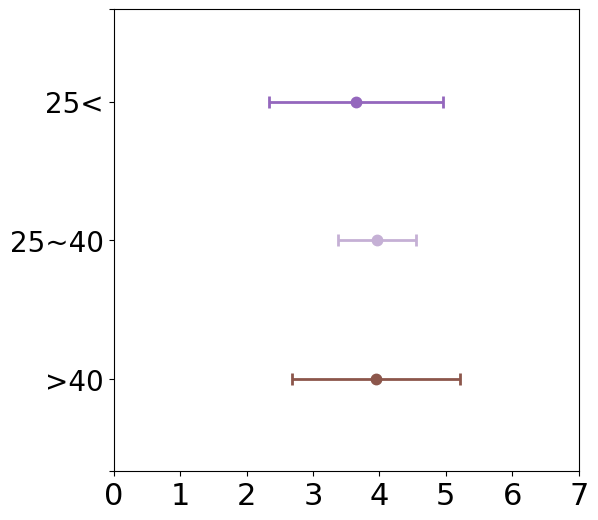

In [20]:
age_colors = {
    'under25': COLOR[8],
    'between25and40':COLOR[9],
    'upper40': COLOR[10],
}
groups=['under25','between25and40','upper40']
groups=groups[::-1]
model_offset={
    'under25': -0.1,
    'between25and40': 0.1,
    'upper40': 0.2,
}
olses=[ols_upper40,ols_between25and40,ols_under25]
plt.figure(figsize=(6, 6))
added_labels = set()

for group, ols in zip(groups, olses):
    dy_low, dy_high = ols.conf_int().loc['MAX']
    dy = (dy_high - dy_low) / 2
    x = ols.params['MAX'] + model_offset[group]  # 调整 x 值
    if group=='upper40':
        y = 0.2
    elif group=='between25and40':
        y=0.5
    else:
        y=0.8
    plt.errorbar(x, y, xerr=dy, fmt='.', markersize=15,
                 ecolor=age_colors[group], color=age_colors[group], elinewidth=2, capsize=4, capthick=2)

plt.yticks([0, 0.2,0.5,0.8, 1], ['','>40', '25~40', '25<',''], fontsize=20)
plt.xticks(fontsize=18)
plt.xlim(0,7)
plt.xticks(fontsize=22)

#plt.yticks(fontsize=22)
#plt.tight_layout()
path='C:/Users/86158/Desktop/外卖糖分摄入/程序整理/figure_age1.pdf'
plt.savefig(path)
plt.show()

## edu_level

In [6]:
from statsmodels.formula.api import ols
df=pd.read_csv(f'C:/Users/86158/Desktop/外卖糖分摄入/程序整理/异质性分析_最终版本/异质性分析/edu_level/cities_edu.csv',parse_dates=['dt'],index_col=['dt'])
df.replace([np.inf, -np.inf], np.nan, inplace=True)
beijing=df[(df['city']=='beijing')]['2019-05-21':'2019-09-16']
xian=df[(df['city'] =='xian')]['2019-05-21':'2019-09-09']
changsha=df[(df['city'] =='changsha')]['2019-05-22':'2019-10-10']
shenzhen=df[(df['city'] =='shenzhen')]['2019-03-26':'2019-11-27']

beijing['num_dessert']=beijing['num_dessert']/beijing['num_dessert'].max()
xian['num_dessert']=xian['num_dessert']/xian['num_dessert'].max()
changsha['num_dessert']=changsha['num_dessert']/changsha['num_dessert'].max()
shenzhen['num_dessert']=shenzhen['num_dessert']/shenzhen['num_dessert'].max()

beijing.loc[beijing['edu_level']=='Undergraduate', 'sugar_weight'] = beijing.loc[beijing['edu_level']=='Undergraduate', 'sugar_weight'] * 100 / 16843.544159999998
beijing.loc[beijing['edu_level']=='Lower than Undergraduate', 'sugar_weight'] = beijing.loc[beijing['edu_level']=='Lower than Undergraduate', 'sugar_weight'] * 100 /1386.7872599999998
xian.loc[xian['edu_level']=='Undergraduate', 'sugar_weight'] = xian.loc[xian['edu_level']=='Undergraduate', 'sugar_weight'] * 100 / 9671.82474
xian.loc[xian['edu_level']=='Lower than Undergraduate', 'sugar_weight'] = xian.loc[xian['edu_level']=='Lower than Undergraduate', 'sugar_weight'] * 100 / 1581.38228
changsha.loc[changsha['edu_level']=='Undergraduate', 'sugar_weight'] = changsha.loc[changsha['edu_level']=='Undergraduate', 'sugar_weight'] * 100 / 13990.48394 
changsha.loc[changsha['edu_level']=='Lower than Undergraduate', 'sugar_weight'] = changsha.loc[changsha['edu_level']=='Lower than Undergraduate', 'sugar_weight'] * 100 / 2645.07415
shenzhen.loc[shenzhen['edu_level']=='Undergraduate', 'sugar_weight'] = shenzhen.loc[shenzhen['edu_level']=='Undergraduate', 'sugar_weight'] * 100 / 13498.16031 
shenzhen.loc[shenzhen['edu_level']=='Lower than Undergraduate', 'sugar_weight'] = shenzhen.loc[shenzhen['edu_level']=='Lower than Undergraduate', 'sugar_weight'] * 100 / 1942.28067


df = pd.concat([beijing,xian,changsha,shenzhen])
df.loc[df['edu_level']=='Lower than Undergraduate','edu_level']='L'
df.loc[df['edu_level']=='Undergraduate','edu_level']='H'
df['group']=df['city']+'_'+df['edu_level']


df=df.dropna()
df=df[df['MAX']>=21]
df['MAX']=df['MAX']-22


NUM_BINS=8
col=['RH','num_dessert','WDSP','PRCP']

dic={}
for i in col:
    dic[i+'_min']=df[i].min()
    dic[i+'_max']=df[i].max()
    interval=(df[i].max()-df[i].min())/(NUM_BINS-1)
    dic[i+'_bins']=np.arange(df[i].min(),df[i].max()+2*interval,interval).tolist()
df['RH_cut'] = pd.cut(df['RH'], bins=dic['RH_bins'], labels=range(0, NUM_BINS),right=False).astype(int)
df['num_dessert_cut'] = pd.cut(df['num_dessert'], bins=dic['num_dessert_bins'], labels=range(0,NUM_BINS),right=False).astype(int)
df['WDSP_cut'] = pd.cut(df['WDSP'], bins=dic['WDSP_bins'], labels=range(0, NUM_BINS),right=False).astype(int)
df['PRCP_cut'] = pd.cut(df['PRCP'], bins=dic['PRCP_bins'], labels=range(0, NUM_BINS),right=False).astype(int)
#拟合模型
ols_Low = ols('sugar_weight ~ MAX+RH_cut+PRCP_cut+WDSP_cut+num_dessert_cut+C(week_dt)+C(city)', df[df['edu_level']=='L'])
ols_Low = ols_Low.fit()
print(ols_Low.summary())
ols_High = ols('sugar_weight ~ MAX+RH_cut+PRCP_cut+WDSP_cut+num_dessert_cut+C(week_dt)+C(city)', df[df['edu_level']=='H'])
ols_High = ols_High.fit()
print(ols_High.summary())


                            OLS Regression Results                            
Dep. Variable:           sugar_weight   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     22.08
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           3.65e-45
Time:                        12:45:35   Log-Likelihood:                -3164.8
No. Observations:                 585   AIC:                             6360.
Df Residuals:                     570   BIC:                             6425.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              50.5880    

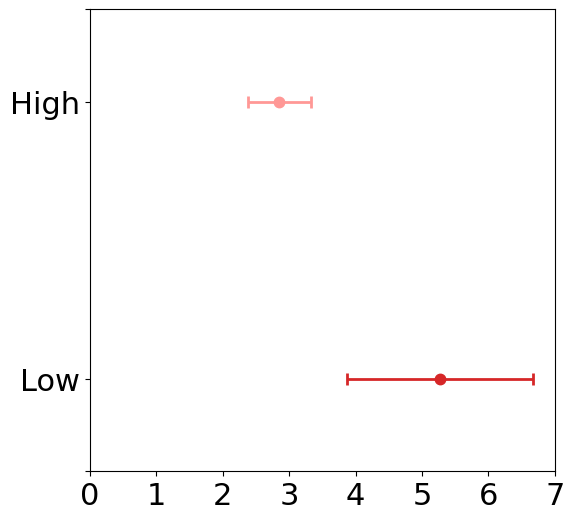

In [7]:
edu_colors = {
    'Low': COLOR[6],
    'High': COLOR[7],
}
groups=['Low','High']
model_offset={
    'Low': 0.1,
    'High': -0.1,
}
olses=[ols_Low,ols_High]
#olses=olses[::-
plt.figure(figsize=(6, 6))
added_labels = set()

for group, ols in zip(groups, olses):
    dy_low, dy_high = ols.conf_int().loc['MAX']
    dy = (dy_high - dy_low) / 2
    x = ols.params['MAX'] + model_offset[group]  # 调整 x 值
    y = 0.2 if group == 'Low' else 0.8  # 将 'M' 和 'F' 转换为纵坐标值
    plt.errorbar(x, y, xerr=dy, fmt='.', markersize=15,
                 ecolor=edu_colors[group], color=edu_colors[group], elinewidth=2, capsize=4, capthick=2)

plt.yticks([0, 0.2,0.8, 1], ['','Low',  'High',''], fontsize=20)  # 设置纵坐标刻度为 'M' 和 'F'，将 0.6 的位置留空
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(0,7)
#plt.tight_layout()
#plt.yticks([])
path='C:/Users/86158/Desktop/外卖糖分摄入/程序整理/figure_edu1.pdf'
plt.savefig(path)
plt.show()

## Salary

In [8]:
from statsmodels.formula.api import ols
df=pd.read_csv(f'C:/Users/86158/Desktop/外卖糖分摄入/程序整理/异质性分析_最终版本/异质性分析/salary/cities.csv',parse_dates=['dt'],index_col=['dt'])
df.replace([np.inf, -np.inf], np.nan, inplace=True)
beijing=df[(df['city']=='beijing')]['2019-05-21':'2019-09-16']#118
xian=df[(df['city'] =='xian')]['2019-05-21':'2019-09-09']#111
changsha=df[(df['city'] =='changsha')]['2019-05-22':'2019-10-10']#141
shenzhen=df[(df['city'] =='shenzhen')]['2019-03-26':'2019-11-27']#246

beijing['num_dessert']=beijing['num_dessert']/beijing['num_dessert'].max()
xian['num_dessert']=xian['num_dessert']/xian['num_dessert'].max()
changsha['num_dessert']=changsha['num_dessert']/changsha['num_dessert'].max()
shenzhen['num_dessert']=shenzhen['num_dessert']/shenzhen['num_dessert'].max()

beijing.loc[beijing['salary']=='Low', 'sugar_weight'] = beijing.loc[beijing['salary']=='Low', 'sugar_weight'] * 100 / 2419.36422
beijing.loc[beijing['salary']=='Mid', 'sugar_weight'] = beijing.loc[beijing['salary']=='Mid', 'sugar_weight'] * 100 / 7051.78946
beijing.loc[beijing['salary']=='High', 'sugar_weight'] = beijing.loc[beijing['salary']=='High', 'sugar_weight'] * 100 / 8769.21024
xian.loc[xian['salary']=='Low', 'sugar_weight'] = xian.loc[xian['salary']=='Low', 'sugar_weight'] * 100 / 1507.71652
xian.loc[xian['salary']=='Mid', 'sugar_weight'] = xian.loc[xian['salary']=='Mid', 'sugar_weight'] * 100 / 6867.044800000001
xian.loc[xian['salary']=='High', 'sugar_weight'] = xian.loc[xian['salary']=='High', 'sugar_weight'] * 100 / 2882.8088
changsha.loc[changsha['salary']=='Low', 'sugar_weight'] = changsha.loc[changsha['salary']=='Low', 'sugar_weight'] * 100 / 2505.1329300000007
changsha.loc[changsha['salary']=='Mid', 'sugar_weight'] = changsha.loc[changsha['salary']=='Mid', 'sugar_weight'] * 100 / 10625.35261
changsha.loc[changsha['salary']=='High', 'sugar_weight'] = changsha.loc[changsha['salary']=='High', 'sugar_weight'] * 100 / 3505.07255
shenzhen.loc[shenzhen['salary']=='Low', 'sugar_weight'] = shenzhen.loc[shenzhen['salary']=='Low', 'sugar_weight'] * 100 / 613.3494800000001
shenzhen.loc[shenzhen['salary']=='Mid', 'sugar_weight'] = shenzhen.loc[shenzhen['salary']=='Mid', 'sugar_weight'] * 100 / 7339.028390000001
shenzhen.loc[shenzhen['salary']=='High', 'sugar_weight'] = shenzhen.loc[shenzhen['salary']=='High', 'sugar_weight'] * 100 / 7497.24136


df = pd.concat([beijing,xian,changsha,shenzhen])

df=df.dropna()
df=df[df['MAX']>=21]
df['MAX']=df['MAX']-22

NUM_BINS=8
col=['RH','num_dessert','WDSP','PRCP']
dic={}
for i in col:
    dic[i+'_min']=df[i].min()
    dic[i+'_max']=df[i].max()
    interval=(df[i].max()-df[i].min())/(NUM_BINS-1)
    dic[i+'_bins']=np.arange(df[i].min(),df[i].max()+2*interval,interval).tolist()
print(dic)
df['RH_cut'] = pd.cut(df['RH'], bins=dic['RH_bins'], labels=range(0, NUM_BINS),right=False).astype(int)
df['num_dessert_cut'] = pd.cut(df['num_dessert'], bins=dic['num_dessert_bins'], labels=range(0,NUM_BINS),right=False).astype(int)
df['WDSP_cut'] = pd.cut(df['WDSP'], bins=dic['WDSP_bins'], labels=range(0, NUM_BINS),right=False).astype(int)
df['PRCP_cut'] = pd.cut(df['PRCP'], bins=dic['PRCP_bins'], labels=range(0, NUM_BINS),right=False).astype(int)

#拟合模型
ols_Low = ols('sugar_weight ~ MAX+RH_cut+PRCP_cut+WDSP_cut+num_dessert_cut+C(week_dt)+C(city)', df[df['salary']=='Low'])
ols_Low = ols_Low.fit()
print(ols_Low.summary())
ols_Mid = ols('sugar_weight ~ MAX+RH_cut+PRCP_cut+WDSP_cut+num_dessert_cut+C(week_dt)+C(city)', df[df['salary']=='Mid'])
ols_Mid = ols_Mid.fit()
print(ols_Mid.summary())
ols_High = ols('sugar_weight ~ MAX+RH_cut+PRCP_cut+WDSP_cut+num_dessert_cut+C(week_dt)+C(city)', df[df['salary']=='High'])
ols_High = ols_High.fit()
print(ols_High.summary())

{'RH_min': 18.6, 'RH_max': 100.0, 'RH_bins': [18.6, 30.22857142857143, 41.85714285714286, 53.48571428571429, 65.11428571428573, 76.74285714285716, 88.37142857142857, 100.0, 111.62857142857143], 'num_dessert_min': 0.2485207100591716, 'num_dessert_max': 1.0, 'num_dessert_bins': [0.2485207100591716, 0.3558748943364328, 0.46322907861369406, 0.5705832628909553, 0.6779374471682165, 0.7852916314454776, 0.892645815722739, 1.0000000000000002, 1.1073541842772614], 'WDSP_min': 1.2, 'WDSP_max': 6.6, 'WDSP_bins': [1.2, 1.9714285714285713, 2.742857142857143, 3.5142857142857142, 4.285714285714286, 5.057142857142857, 5.828571428571428, 6.6, 7.371428571428571], 'PRCP_min': 0.0, 'PRCP_max': 101.09, 'PRCP_bins': [0.0, 14.441428571428572, 28.882857142857144, 43.324285714285715, 57.76571428571429, 72.20714285714286, 86.64857142857143, 101.09, 115.53142857142858]}
                            OLS Regression Results                            
Dep. Variable:           sugar_weight   R-squared:                

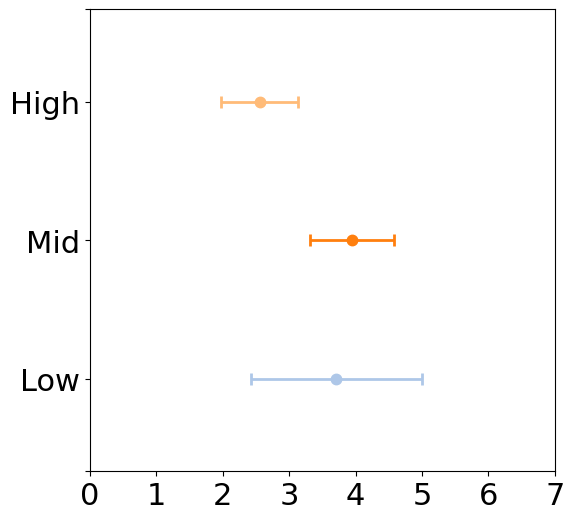

In [9]:
edu_colors = {
    'Low': COLOR[1],
    'Mid':COLOR[2],
    'High': COLOR[3],
}
groups=['Low','Mid','High']
model_offset={
    'Low': -0.1,
    'Mid': 0.1,
    'High': 0.2,
}
olses=[ols_Low,ols_Mid,ols_High]
plt.figure(figsize=(6, 6))
added_labels = set()

for group, ols in zip(groups, olses):
    dy_low, dy_high = ols.conf_int().loc['MAX']
    dy = (dy_high - dy_low) / 2
    x = ols.params['MAX'] + model_offset[group]  # 调整 x 值
    if group=='Low':
        y = 0.2
    elif group=='Mid':
        y=0.5
    else:
        y=0.8
    plt.errorbar(x, y, xerr=dy, fmt='.', markersize=15,
                 ecolor=edu_colors[group], color=edu_colors[group], elinewidth=2, capsize=4, capthick=2)

plt.yticks([0, 0.2,0.5,0.8, 1], ['','Low', 'Mid', 'High',''],fontsize=22)  # 设置纵坐标刻度为 'M' 和 'F'，将 0.6 的位置留空
plt.xticks(fontsize=22)
plt.ylabel(None)

plt.xlim(0,7)
#plt.yticks([])
path='C:/Users/86158/Desktop/外卖糖分摄入/程序整理/figure_salary1.pdf'
plt.savefig(path)
plt.show()

# Figure S2 b,d,f,h

In [10]:
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sympy import true
import matplotlib.pyplot as plt
from pprint import pprint
import statsmodels.stats as stats
import math
from matplotlib.ticker import MultipleLocator
COLOR = sns.color_palette("tab20")

## gender

In [ ]:
beijing_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/beijing_naicha.parquet")
beijing_data['city']='beijing'
xian_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/xian_naicha.parquet")
xian_data['city']='xian'
changsha_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/changsha_naicha.parquet")
changsha_data['city']='changsha'
shenzhen_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/shenzhen_naicha.parquet")
shenzhen_data['city']='shenzhen'

df=pd.concat([beijing_data,xian_data,changsha_data,shenzhen_data])

female_data=df[df['gender']=='F']
female_user=female_data['user_id'].unique()
male_data=df[df['gender']=='M']
male_user=male_data['user_id'].unique()
female_data['dt']=pd.to_datetime(female_data['dt'])
female_data=female_data.groupby('dt')['cnt'].sum().reset_index()
female_data['cnt']=female_data['cnt']/len(female_user)*10000
male_data['dt']=pd.to_datetime(male_data['dt'])
male_data=male_data.groupby('dt')['cnt'].sum().reset_index()
male_data['cnt']=male_data['cnt']/len(male_user)*10000
female_data=female_data[(female_data['dt']>= '2019-05-21')&(female_data['dt']<= '2019-09-09')]
male_data=male_data[(male_data['dt']>= '2019-05-21')&(male_data['dt']<= '2019-09-09')]

female_data['gender']='F'
male_data['gender']='M'
df=pd.concat([female_data,male_data])

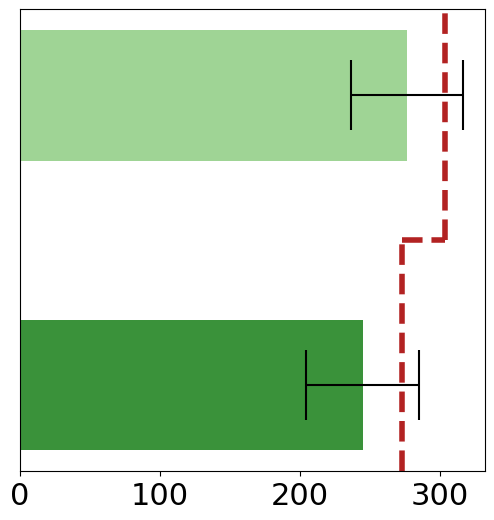

In [13]:
# 计算不同性别的cnt的平均值和方差
gender_stats = df.groupby('gender')['cnt'].agg(['mean', 'std']).reset_index()
edu_colors = {
    'M': COLOR[4],
    'F': COLOR[5],
}

# 创建一个新的图形和轴
fig, ax = plt.subplots(figsize=(6, 6))

# 绘制水平柱状图
bar_plot = sns.barplot(x='mean', y='gender', data=gender_stats,palette=edu_colors, width=0.45)

# 添加方差为误差线
for index, row in gender_stats.iterrows():
    ax.errorbar(row['mean'], row['gender'], xerr=row['std'], fmt='none', c='black', capsize=25, elinewidth=1.5,capthick=1.5)

# 添加标题和标签
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel(None)
plt.ylabel(None)
plt.yticks([])
ax.tick_params(axis='x', which='both', bottom=True, top=False)  # 保留x轴刻度线

# 添加阶梯状饱和线
high_value = 304.1120022252098
low_value = 272.8722725532729
middle_y = 0.5  # 设定阶梯线的位置，可以调整这个值
plt.axvline(x=high_value, ymin=middle_y, ymax=1, color='firebrick', linestyle='--', linewidth=4)
plt.axvline(x=low_value, ymin=0, ymax=middle_y, color='firebrick', linestyle='--', linewidth=4)
plt.hlines(y=middle_y, xmin=low_value, xmax=high_value, color='firebrick', linestyle='--', linewidth=4)

# 去掉网格线
ax.grid(False)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
ax.xaxis.set_major_locator(MultipleLocator(100))
# 显示图表
path='C:/Users/86158/Desktop/外卖糖分摄入/程序整理/figure_gender2.pdf'
plt.savefig(path)
plt.show()


## age

In [14]:
beijing_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/beijing_naicha.parquet")
beijing_data['city']='beijing'
xian_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/xian_naicha.parquet")
xian_data['city']='xian'
changsha_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/changsha_naicha.parquet")
changsha_data['city']='changsha'
shenzhen_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/shenzhen_naicha.parquet")
shenzhen_data['city']='shenzhen'

df=pd.concat([beijing_data,xian_data,changsha_data,shenzhen_data])

under25_data=df[(df['age']==0)|(df['age']==1)]

under25_user=under25_data['user_id'].unique()

between25and40_data=df[(df['age']==2)|(df['age']==3)|(df['age']==4)]

between25and40_user=between25and40_data['user_id'].unique()

upper40_data=df[(df['age']==5)]

upper40_user=upper40_data['user_id'].unique()

under25_data['dt']=pd.to_datetime(under25_data['dt'])
under25_data=under25_data.groupby('dt')['cnt'].sum().reset_index()
under25_data['cnt']=under25_data['cnt']/len(under25_user)*10000
between25and40_data['dt']=pd.to_datetime(between25and40_data['dt'])
between25and40_data=between25and40_data.groupby('dt')['cnt'].sum().reset_index()
between25and40_data['cnt']=between25and40_data['cnt']/len(between25and40_user)*10000

upper40_data['dt']=pd.to_datetime(upper40_data['dt'])
upper40_data=upper40_data.groupby('dt')['cnt'].sum().reset_index()
upper40_data['cnt']=upper40_data['cnt']/len(upper40_user)*10000

under25_data=under25_data[(under25_data['dt']>= '2019-05-21')&(under25_data['dt']<= '2019-09-09')]
between25and40_data=between25and40_data[(between25and40_data['dt']>= '2019-05-21')&(between25and40_data['dt']<= '2019-09-09')]
upper40_data=upper40_data[(upper40_data['dt']>= '2019-05-21')&(upper40_data['dt']<= '2019-09-09')]

under25_data['age']='<25'
between25and40_data['age']='25~40'
upper40_data['age']='>40'
df=pd.concat([under25_data,between25and40_data,upper40_data])

C:\Users\86158\AppData\Local\Temp\ipykernel_25368\89757914.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under25_data['dt']=pd.to_datetime(under25_data['dt'])
C:\Users\86158\AppData\Local\Temp\ipykernel_25368\89757914.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  between25and40_data['dt']=pd.to_datetime(between25and40_data['dt'])
C:\Users\86158\AppData\Local\Temp\ipykernel_25368\89757914.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

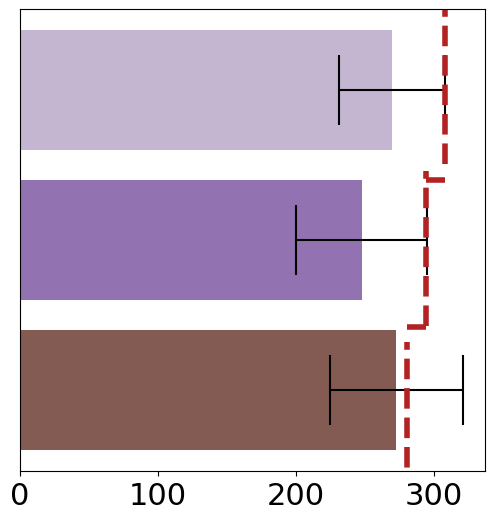

In [15]:
# 计算不同性别的cnt的平均值和方差
gender_stats = df.groupby('age')['cnt'].agg(['mean', 'std']).reset_index()
edu_colors = {
    '<25': COLOR[8],
    '25~40':COLOR[9],
    '>40': COLOR[10],
}

# 创建一个新的图形和轴
fig, ax = plt.subplots(figsize=(6, 6))

# 绘制水平柱状图
bar_plot = sns.barplot(x='mean', y='age', data=gender_stats,palette=edu_colors, width=0.8)

# 添加方差为误差线
for index, row in gender_stats.iterrows():
    ax.errorbar(row['mean'], row['age'], xerr=row['std'], fmt='none', c='black', capsize=25, elinewidth=1.5,capthick=1.5)

# 添加标题和标签
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel(None)
plt.ylabel(None)
plt.yticks([])
ax.tick_params(axis='x', which='both', bottom=True, top=False)  # 保留x轴刻度线

# 添加阶梯状饱和线
values = [279.9743534943364, 294.3988340375461, 307.51150719811966]
y_positions = [0.13, 0.5, 0.85]  # 台阶的y位置
for value, y_position in zip(values, y_positions):
    plt.axvline(x=value, ymin=y_position - 0.185, ymax=y_position + 0.15, color='firebrick', linestyle='--', linewidth=4)
plt.hlines(y=y_positions[1]+ 0.1, xmin=values[1], xmax=values[1+1], color='firebrick', linestyle='--', linewidth=4)
plt.hlines(y=y_positions[0]+1.45, xmin=values[0], xmax=values[0+1], color='firebrick', linestyle='--', linewidth=4)
# 去掉网格线
ax.grid(False)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
ax.xaxis.set_major_locator(MultipleLocator(100))
# 显示图表
path='C:/Users/86158/Desktop/外卖糖分摄入/程序整理/figure_age2.pdf'
plt.savefig(path)
plt.show()

## edu level

In [16]:
beijing_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/beijing_naicha.parquet")
beijing_data['city']='beijing'
xian_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/xian_naicha.parquet")
xian_data['city']='xian'
changsha_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/changsha_naicha.parquet")
changsha_data['city']='changsha'
shenzhen_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/shenzhen_naicha.parquet")
shenzhen_data['city']='shenzhen'

df=pd.concat([beijing_data,xian_data,changsha_data,shenzhen_data])

female_data=df[df['edu_level']=='Undergraduate']
female_user=female_data['user_id'].unique()
male_data=df[df['edu_level']=='Lower than Undergraduate']
male_user=male_data['user_id'].unique()
female_data['dt']=pd.to_datetime(female_data['dt'])
female_data=female_data.groupby('dt')['cnt'].sum().reset_index()
female_data['cnt']=female_data['cnt']/len(female_user)*10000
male_data['dt']=pd.to_datetime(male_data['dt'])
male_data=male_data.groupby('dt')['cnt'].sum().reset_index()
male_data['cnt']=male_data['cnt']/len(male_user)*10000
female_data=female_data[(female_data['dt']>= '2019-05-21')&(female_data['dt']<= '2019-09-09')]
male_data=male_data[(male_data['dt']>= '2019-05-21')&(male_data['dt']<= '2019-09-09')]

female_data['edu_level']='H'
male_data['edu_level']='L'
df=pd.concat([female_data,male_data])

C:\Users\86158\AppData\Local\Temp\ipykernel_25368\373219377.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data['dt']=pd.to_datetime(female_data['dt'])
C:\Users\86158\AppData\Local\Temp\ipykernel_25368\373219377.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data['dt']=pd.to_datetime(male_data['dt'])


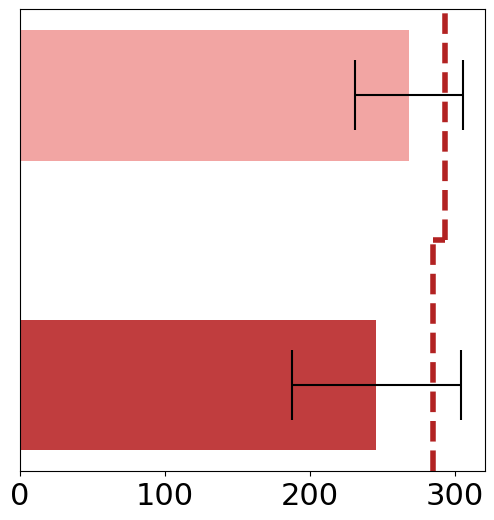

In [17]:
# 计算不同性别的cnt的平均值和方差
gender_stats = df.groupby('edu_level')['cnt'].agg(['mean', 'std']).reset_index()
edu_colors = {
   'L': COLOR[6],
   'H': COLOR[7],
}

# 创建一个新的图形和轴
fig, ax = plt.subplots(figsize=(6, 6))

# 绘制水平柱状图
bar_plot = sns.barplot(x='mean', y='edu_level', data=gender_stats,palette=edu_colors, width=0.45)

# 添加方差为误差线
for index, row in gender_stats.iterrows():
    ax.errorbar(row['mean'], row['edu_level'], xerr=row['std'], fmt='none', c='black', capsize=25, elinewidth=1.5,capthick=1.5)

# 添加标题和标签
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel(None)
plt.ylabel(None)
plt.yticks([])
ax.tick_params(axis='x', which='both', bottom=True, top=False)  # 保留x轴刻度线

# 添加阶梯状饱和线
high_value = 293.3074322841213
low_value = 284.79910869716593
middle_y = 0.5  # 设定阶梯线的位置，可以调整这个值
plt.axvline(x=high_value, ymin=middle_y, ymax=1, color='firebrick', linestyle='--', linewidth=4)
plt.axvline(x=low_value, ymin=0, ymax=middle_y, color='firebrick', linestyle='--', linewidth=4)
plt.hlines(y=middle_y, xmin=low_value, xmax=high_value, color='firebrick', linestyle='--', linewidth=4)

# 去掉网格线
ax.grid(False)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
ax.xaxis.set_major_locator(MultipleLocator(100))
# 显示图表
path='C:/Users/86158/Desktop/外卖糖分摄入/程序整理/figure_edu2.pdf'
plt.savefig(path)
plt.show()

## Salary

In [18]:
beijing_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/beijing_naicha.parquet")
beijing_data['city']='beijing'
xian_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/xian_naicha.parquet")
xian_data['city']='xian'
changsha_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/changsha_naicha.parquet")
changsha_data['city']='changsha'
shenzhen_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/shenzhen_naicha.parquet")
shenzhen_data['city']='shenzhen'

df=pd.concat([beijing_data,xian_data,changsha_data,shenzhen_data])

under25_data=df[(df['salary']=='Low')]

under25_user=under25_data['user_id'].unique()

between25and40_data=df[(df['salary']=='Mid')]

between25and40_user=between25and40_data['user_id'].unique()

upper40_data=df[(df['salary']=='High')]

upper40_user=upper40_data['user_id'].unique()

under25_data['dt']=pd.to_datetime(under25_data['dt'])
under25_data=under25_data.groupby('dt')['cnt'].sum().reset_index()
under25_data['cnt']=under25_data['cnt']/len(under25_user)*10000
between25and40_data['dt']=pd.to_datetime(between25and40_data['dt'])
between25and40_data=between25and40_data.groupby('dt')['cnt'].sum().reset_index()
between25and40_data['cnt']=between25and40_data['cnt']/len(between25and40_user)*10000

upper40_data['dt']=pd.to_datetime(upper40_data['dt'])
upper40_data=upper40_data.groupby('dt')['cnt'].sum().reset_index()
upper40_data['cnt']=upper40_data['cnt']/len(upper40_user)*10000

under25_data=under25_data[(under25_data['dt']>= '2019-05-21')&(under25_data['dt']<= '2019-09-09')]
between25and40_data=between25and40_data[(between25and40_data['dt']>= '2019-05-21')&(between25and40_data['dt']<= '2019-09-09')]
upper40_data=upper40_data[(upper40_data['dt']>= '2019-05-21')&(upper40_data['dt']<= '2019-09-09')]

under25_data['salary']='Low'
between25and40_data['salary']='Mid'
upper40_data['salary']='High'
df=pd.concat([under25_data,between25and40_data,upper40_data])

C:\Users\86158\AppData\Local\Temp\ipykernel_25368\3398861538.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under25_data['dt']=pd.to_datetime(under25_data['dt'])
C:\Users\86158\AppData\Local\Temp\ipykernel_25368\3398861538.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  between25and40_data['dt']=pd.to_datetime(between25and40_data['dt'])
C:\Users\86158\AppData\Local\Temp\ipykernel_25368\3398861538.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

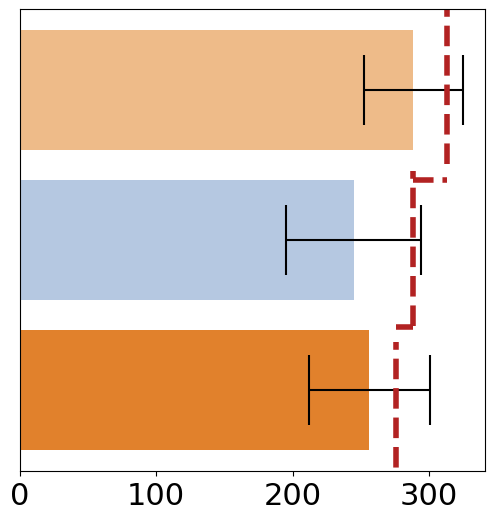

In [19]:
# 计算不同性别的cnt的平均值和方差
gender_stats = df.groupby('salary')['cnt'].agg(['mean', 'std']).reset_index()
edu_colors = {
    'Low': COLOR[1],
    'Mid':COLOR[2],
    'High': COLOR[3],
}

# 创建一个新的图形和轴
fig, ax = plt.subplots(figsize=(6, 6))

# 绘制水平柱状图
bar_plot = sns.barplot(x='mean', y='salary', data=gender_stats,palette=edu_colors, width=0.8)

# 添加方差为误差线
for index, row in gender_stats.iterrows():
    ax.errorbar(row['mean'], row['salary'], xerr=row['std'], fmt='none', c='black', capsize=25, elinewidth=1.5,capthick=1.5)

# 添加标题和标签
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel(None)
plt.ylabel(None)
plt.yticks([])
ax.tick_params(axis='x', which='both', bottom=True, top=False)  # 保留x轴刻度线

# 添加阶梯状饱和线
values = [275.4107170274835, 287.9578896584996, 312.9356412639405]
#275.4107170274835
#287.9578896584996
#312.9356412639405
y_positions = [0.13, 0.5, 0.85]  # 台阶的y位置
for value, y_position in zip(values, y_positions):
    plt.axvline(x=value, ymin=y_position - 0.185, ymax=y_position + 0.15, color='firebrick', linestyle='--', linewidth=4)
plt.hlines(y=y_positions[1]+ 0.1, xmin=values[1], xmax=values[1+1], color='firebrick', linestyle='--', linewidth=4)
plt.hlines(y=y_positions[0]+1.45, xmin=values[0], xmax=values[0+1], color='firebrick', linestyle='--', linewidth=4)
# 去掉网格线
ax.grid(False)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
ax.xaxis.set_major_locator(MultipleLocator(100))
# 显示图表
path='C:/Users/86158/Desktop/外卖糖分摄入/程序整理/figure_salary2.pdf'
plt.savefig(path)
plt.show()